In [7]:
# testing
import numpy as np
import importlib
import classA_U1FGTN
importlib.reload(classA_U1FGTN)
from matplotlib import pyplot as plt
from classA_U1FGTN import classA_U1FGTN
from IPython.display import Image, display
import os

In [ ]:
# Local chern marker

# Small-ish grid and a few cycles so it runs quickly in a notebook.
Nx, Ny   = 8, 8
cycles   = 6          # increase if you want a longer animation

# Build the model
m = classA_U1FGTN(Nx, Ny, DW=False, nshell=None)

# Evolve (keep history -> frames for the GIF)
m.run_adaptive_circuit(cycles=cycles, G_history=True, progress=True)

# Make animation (GIF @ 1 fps) and save final static frame (PDF)
gif_path, final_path, C_last, G_last = m.chern_marker_dynamics()

print("Saved files:")
print("  GIF :", gif_path)
print("  PDF :", final_path)

# Show the GIF inline
if os.path.exists(gif_path):
    display(Image(filename=gif_path))

# Also show the final Chern-marker array inline (same data as the saved PDF)
plt.figure(figsize=(3.6, 4.2))
plt.imshow(C_last, cmap='RdBu_r', vmin=-1.0, vmax=1.0, origin='upper', aspect='equal')
plt.xlabel("y"); plt.ylabel("x")
plt.title(r"Final $\tanh\mathcal{C}(\mathbf{r})$")
plt.colorbar(orientation='horizontal', ticks=[-1,0,1], pad=0.08)
plt.show()

DWs at x=(3, 5)


Cycles:   0%|          | 0/6 [00:04<?, ?it/s, elapsed=00:04, eta_total=09:02, G2==I=1]


KeyboardInterrupt: 

In [5]:

# Plot using existing history (no rerun)
fig, ax, cherns, flags = m.plot_chern_vs_cycle(reuse_history=True)

AttributeError: 'classA_U1FGTN' object has no attribute 'plot_chern_vs_cycle'

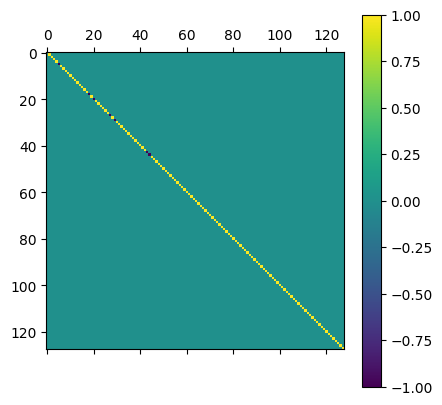

In [4]:
Nx, Ny   = 8, 8
m = classA_U1FGTN(Nx, Ny, DW=False, nshell=None)
Nlayer = 2*Nx*Ny
plt.matshow(m.G0[Nlayer:,Nlayer:].real)
plt.colorbar()


In [81]:
Nx, Ny = 8, 8
Nlayer = int(2*Nx*Ny)
diag = np.concatenate([np.ones(Nlayer//2), -np.ones(Nlayer//2), np.ones(Nlayer)])
U = m.random_unitary(N=int(2*Nlayer))
G0 = U.conj().T @ np.diag(diag).astype(np.complex128) @ U
m = classA_U1FGTN(Nx, Ny, DW=False, nshell=None, G0=G0)
m.run_adaptive_circuit(cycles = 5, postselect=False)


Cycles: 100%|██████████| 5/5 [08:04<00:00, 96.84s/it, cycle=5/5, pos=(7,7), iter=320, G2==I=1]


In [1]:
Nlayer = 2*Nx*Ny
G2_dyn = (1/2)*(m.G[:Nlayer,:Nlayer]+np.eye(Nlayer))
G2_exact = (1/2)*(m.G_CI()+np.eye(Nlayer))

fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Row 1: Dynamical two-point
im0 = axes[0, 0].matshow(G2_dyn.real)
axes[0, 0].set_title("Dynamical two-point (real)")
fig.colorbar(im0, ax=axes[0, 0])

im1 = axes[0, 1].matshow(G2_dyn.imag)
axes[0, 1].set_title("Dynamical two-point (imag)")
fig.colorbar(im1, ax=axes[0, 1])

# Row 2: Exact two-point
im2 = axes[1, 0].matshow(G2_exact.real)
axes[1, 0].set_title("Exact two-point (real)")
fig.colorbar(im2, ax=axes[1, 0])

im3 = axes[1, 1].matshow(G2_exact.imag)
axes[1, 1].set_title("Exact two-point (imag)")
fig.colorbar(im3, ax=axes[1, 1])

# Row 3: Absolute differences
im4 = axes[2, 0].matshow(np.abs(G2_dyn.real - G2_exact.real))
axes[2, 0].set_title("|Difference| (real)")
fig.colorbar(im4, ax=axes[2, 0])

im5 = axes[2, 1].matshow(np.abs(G2_dyn.imag - G2_exact.imag))
axes[2, 1].set_title("|Difference| (imag)")
fig.colorbar(im5, ax=axes[2, 1])

plt.tight_layout()
plt.show()

NameError: name 'Nx' is not defined

/tmp/ipykernel_3633664/768105827.py:15: UserWarning: Adding colorbar to a different Figure <Figure size 1000x500 with 5 Axes> than <Figure size 1000x1200 with 12 Axes> which fig.colorbar is called on.
  cbar0 = fig.colorbar(im0, ax=axes[0,0])
/tmp/ipykernel_3633664/768105827.py:19: UserWarning: Adding colorbar to a different Figure <Figure size 1000x500 with 6 Axes> than <Figure size 1000x1200 with 12 Axes> which fig.colorbar is called on.
  cbar1 = fig.colorbar(im1, ax=axes[0,1])
/tmp/ipykernel_3633664/768105827.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 1000x500 with 7 Axes> than <Figure size 1000x1200 with 12 Axes> which fig.colorbar is called on.
  cbar2 = fig.colorbar(im2, ax=axes[1,0])
/tmp/ipykernel_3633664/768105827.py:27: UserWarning: Adding colorbar to a different Figure <Figure size 1000x500 with 8 Axes> than <Figure size 1000x1200 with 12 Axes> which fig.colorbar is called on.
  cbar3 = fig.colorbar(im3, ax=axes[1,1])


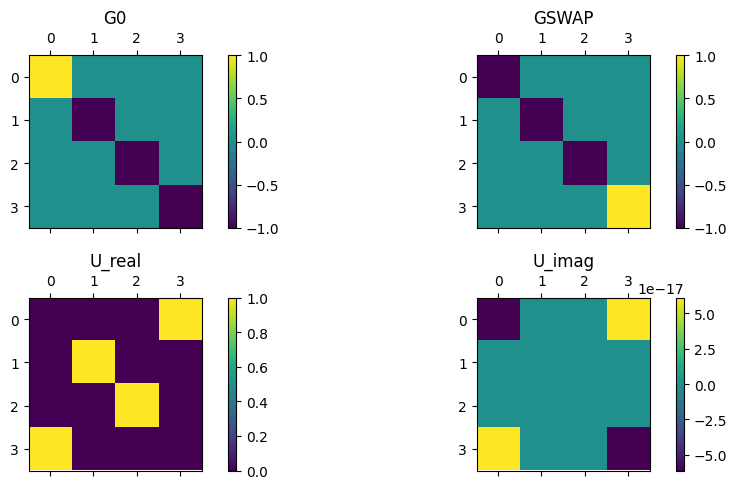

In [51]:
''' fSWAP testing'''
Nx, Ny = 1, 1
Nlayer = int(2*Nx*Ny)
diag = np.concatenate([np.ones(Nlayer//2), -np.ones(Nlayer//2), -np.ones(Nlayer)])
G0 = np.diag(diag).astype(np.complex128)
m = classA_U1FGTN(Nx, Ny, DW=False, nshell=None, G0 = G0)
Ilayer = np.eye(Nlayer)
U = m.fSWAP(Ilayer[0],Ilayer[1])
GSWAP = U @ G0 @ U

ig, axes = plt.subplots(2, 2, figsize=(10, 5))

im0 = axes[0,0].matshow(G0.real)
axes[0,0].set_title("G0")
cbar0 = fig.colorbar(im0, ax=axes[0,0])

im1 = axes[0,1].matshow(GSWAP.real)
axes[0,1].set_title("GSWAP")
cbar1 = fig.colorbar(im1, ax=axes[0,1])

im2 = axes[1,0].matshow(U.real)
axes[1,0].set_title("U_real")
cbar2 = fig.colorbar(im2, ax=axes[1,0])

im3 = axes[1,1].matshow(U.imag)
axes[1,1].set_title("U_imag")
cbar3 = fig.colorbar(im3, ax=axes[1,1])

plt.tight_layout()
plt.show()

In [20]:
# Check exact equality (bit-for-bit)
exact_equal = np.array_equal(G0, GSWAP)
print("Exact equality:", exact_equal)

# Check numerical closeness (useful for floating-point matrices)
close_equal = np.allclose(G0, GSWAP, atol=1e-12, rtol=1e-12)
print("Numerically close:", close_equal)

# Optional: show the maximum absolute difference
max_diff = np.max(np.abs(G0 - GSWAP))
print("Max difference:", max_diff)

Exact equality: False
Numerically close: True
Max difference: 4.440892098500626e-16


In [39]:
Nx, Ny = 1, 1
Nlayer = 2
# Basis order assumed by your code: [top block (Nlayer), bottom block (Nlayer)]
diag = np.array([1, -1,  1, 1], dtype=np.complex128)  # top: [1,-1], bottom: [1,1]
G0 = np.diag(diag)

m = classA_U1FGTN(Nx, Ny, DW=False, nshell=None, G0=G0)
e = np.eye(Nlayer)

U = m.fSWAP(e[1], e[1])            # swap top μ=1 with bottom μ=1
GSWAP = U.conj().T @ G0 @ U

# Checks
print("U unitary? ", np.allclose(U.conj().T @ U, np.eye(2*Nlayer), atol=1e-12))
print("G' Hermitian? ", np.allclose(GSWAP, GSWAP.conj().T, atol=1e-12))

top_idx   = 1                 # μ=1 in the top block
bottom_idx = Nlayer + 1       # μ=1 in the bottom block
print("Before swap:", G0[top_idx, top_idx], G0[bottom_idx, bottom_idx])
print("After swap :", GSWAP[top_idx, top_idx], GSWAP[bottom_idx, bottom_idx])

U unitary?  True
G' Hermitian?  True
Before swap: (-1+0j) (1+0j)
After swap : (0.9999999999999996+0j) (-0.9999999999999996+0j)


[G^2≈I] initial: True
[G^2≈I] after projection: True
[G^2≈I] after fSWAP: True

[Occupancies for A+ @ (1,1); projected occupied]
 top  :  before=0.5187  → proj=1.0000  → fSWAP=0.0000
 bottom: before=0.0000 → proj=0.0000 → fSWAP=1.0000


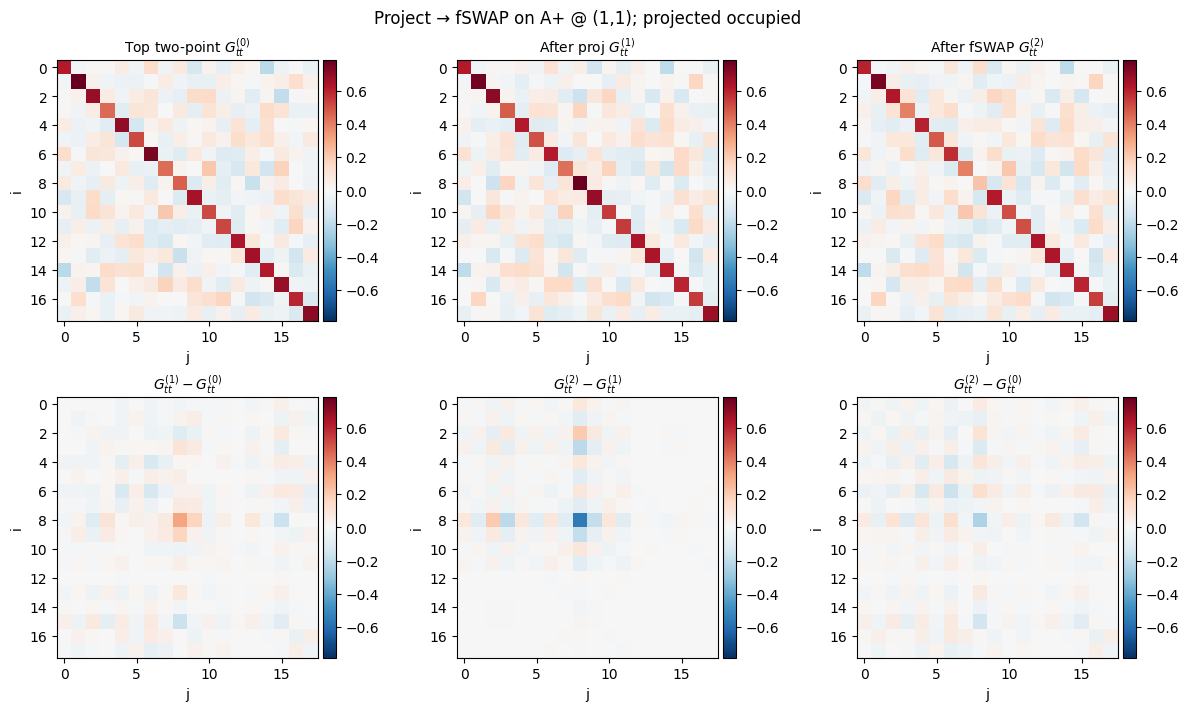

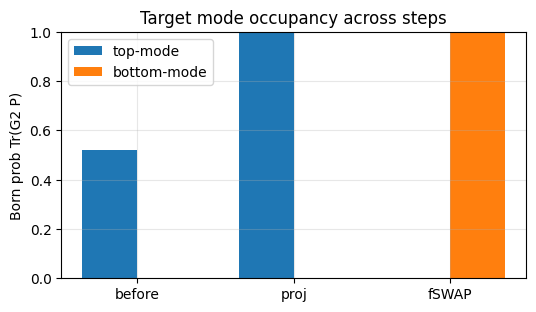

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- helpers to keep plots tidy ---
def add_cbar_same_size(ax, im, label=None):
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax)
    if label: cb.set_label(label)
    return cb

def two_point_blocks(G, Nlayer):
    I = np.eye(Nlayer, dtype=complex)
    Gtt2 = 0.5*(G[:Nlayer, :Nlayer] + I)
    Gbb2 = 0.5*(G[Nlayer:, Nlayer:] + I)
    return Gtt2, Gbb2

def projector_bottom_onehot(Nx, Ny, idx_mu, Rx, Ry):
    """ Bottom one-hot projector onto orbital mu∈{0,1} at cell (Rx,Ry). """
    Nlayer = 2*Nx*Ny
    e = np.eye(Nlayer, dtype=complex)[idx_mu + 2*Rx + 2*Nx*Ry]
    return np.outer(e, e.conj()), e

def occ(P, G2):
    # Born prob = Tr(G2 P) for number-state projector (2-point)
    return np.real_if_close(np.trace(G2 @ P))

def check_g2I(G, atol=1e-8, label=""):
    ok = np.allclose(G @ G, np.eye(G.shape[0], dtype=G.dtype), atol=atol)
    print(f"[G^2≈I] {label}: {ok}")
    return ok

# --- main test: project then fSWAP and visualize ---
def visualize_project_then_fswap(Nx=3, Ny=3, band="+", orb="A", Rx=1, Ry=1, 
                                 particle=True, nshell=None, filling_frac=0.5):
    """
    Steps:
      1) Build model (uniform DW=False) and take its G0.
      2) Choose top Wannier (band∈{'+','-'}, orb∈{'A','B'}) at (Rx,Ry) → P_top, χ_top.
      3) Measure top layer to set that mode (occupied if particle=True else unoccupied).
      4) Apply fSWAP(χ_top, χ_bottom) where χ_bottom is the local bottom orbital (same cell/orb).
      5) Plot G_tt two-point before/after projection & after fSWAP; show Δ matrices.
      6) Track occupancies of that top mode and the matching bottom mode across steps.
    """
    # -- instantiate your class (uses your fSWAP, measure_top_layer, built projectors, etc.) --
    m = classA_U1FGTN(Nx, Ny, DW=False, nshell=nshell, filling_frac=filling_frac)
    G = m.G0.copy()
    Nlayer = m.Ntot // 2

    # pick which top Wannier
    if band == "+" and orb == "A":
        P_top = m.P_Ap[:, :, Rx, Ry]; chi_top = m.WF_Ap[:, Rx, Ry]
        mu_b = 0
    elif band == "+" and orb == "B":
        P_top = m.P_Bp[:, :, Rx, Ry]; chi_top = m.WF_Bp[:, Rx, Ry]
        mu_b = 1
    elif band == "-" and orb == "A":
        P_top = m.P_Am[:, :, Rx, Ry]; chi_top = m.WF_Am[:, Rx, Ry]
        mu_b = 0
    elif band == "-" and orb == "B":
        P_top = m.P_Bm[:, :, Rx, Ry]; chi_top = m.WF_Bm[:, Rx, Ry]
        mu_b = 1
    else:
        raise ValueError("band must be '+' or '-', orb must be 'A' or 'B'.")

    # bottom one-hot at same cell/orbital
    P_bott, chi_bottom = projector_bottom_onehot(Nx, Ny, mu_b, Rx, Ry)

    # --- BEFORE anything ---
    Gtt2_0, Gbb2_0 = two_point_blocks(G, Nlayer)
    p_top_0  = occ(P_top,  Gtt2_0)
    p_bott_0 = occ(P_bott, Gbb2_0)
    check_g2I(G, label="initial")

    # --- After projection (top layer measurement) ---
    G_proj = m.measure_top_layer(G, P_top, particle=particle, symmetrize=True)
    Gtt2_1, Gbb2_1 = two_point_blocks(G_proj, Nlayer)
    p_top_1  = occ(P_top,  Gtt2_1)
    p_bott_1 = occ(P_bott, Gbb2_1)
    check_g2I(G_proj, label="after projection")

    # --- After fSWAP with the chosen top/bottom vectors ---
    U = m.fSWAP(chi_top, chi_bottom)                # uses your method
    G_swap = U @ G_proj @ U.conj().T                # note: U G U^\dagger
    Gtt2_2, Gbb2_2 = two_point_blocks(G_swap, Nlayer)
    p_top_2  = occ(P_top,  Gtt2_2)
    p_bott_2 = occ(P_bott, Gbb2_2)
    check_g2I(G_swap, label="after fSWAP")

    # --- print quick diagnostics ---
    lab = f"{orb}{band} @ ({Rx},{Ry}); projected {'occupied' if particle else 'unoccupied'}"
    print(f"\n[Occupancies for {lab}]")
    print(f" top  :  before={p_top_0:.4f}  → proj={p_top_1:.4f}  → fSWAP={p_top_2:.4f}")
    print(f" bottom: before={p_bott_0:.4f} → proj={p_bott_1:.4f} → fSWAP={p_bott_2:.4f}")

    # --- visualize matrices (Re part) with matched color scales ---
    mats = [Gtt2_0.real, Gtt2_1.real, Gtt2_2.real,
            (Gtt2_1 - Gtt2_0).real, (Gtt2_2 - Gtt2_1).real, (Gtt2_2 - Gtt2_0).real]
    v = np.max(np.abs(mats))
    titles = [
        r"Top two-point $G_{tt}^{(0)}$",
        r"After proj $G_{tt}^{(1)}$",
        r"After fSWAP $G_{tt}^{(2)}$",
        r"$G_{tt}^{(1)}-G_{tt}^{(0)}$",
        r"$G_{tt}^{(2)}-G_{tt}^{(1)}$",
        r"$G_{tt}^{(2)}-G_{tt}^{(0)}$",
    ]

    fig, axes = plt.subplots(2, 3, figsize=(12, 7), constrained_layout=True)
    for ax, M, t in zip(axes.ravel(), mats, titles):
        im = ax.imshow(M, vmin=-v, vmax=v, cmap='RdBu_r', origin='upper')
        ax.set_title(t, fontsize=10)
        ax.set_xlabel("j"); ax.set_ylabel("i")
        add_cbar_same_size(ax, im)

    plt.suptitle(f"Project → fSWAP on {lab}", fontsize=12)
    plt.show()

    # --- small bar chart of the target mode occupancies across steps ---
    steps = ["before", "proj", "fSWAP"]
    top_vals   = [p_top_0,  p_top_1,  p_top_2]
    bott_vals  = [p_bott_0, p_bott_1, p_bott_2]

    fig2, ax2 = plt.subplots(1, 1, figsize=(6, 3.2))
    x = np.arange(len(steps))
    w = 0.35
    ax2.bar(x - w/2, top_vals,  width=w, label="top-mode")
    ax2.bar(x + w/2, bott_vals, width=w, label="bottom-mode")
    ax2.set_xticks(x); ax2.set_xticklabels(steps)
    ax2.set_ylim(0, 1)
    ax2.set_ylabel("Born prob Tr(G2 P)")
    ax2.set_title("Target mode occupancy across steps")
    ax2.legend()
    ax2.grid(alpha=0.3)
    plt.show()

    return {
        "G_before": G, "G_after_proj": G_proj, "G_after_fswap": G_swap,
        "top_probs": (p_top_0, p_top_1, p_top_2),
        "bottom_probs": (p_bott_0, p_bott_1, p_bott_2)
    }

# --- example run ---
# Try: projection to OCCUPIED upper A+ then fSWAP
_ = visualize_project_then_fswap(
        Nx=3, Ny=3, band="+", orb="A", Rx=1, Ry=1, particle=True,
        nshell=None, filling_frac=0.5
    )